In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
#Importação de um CSV para um df (1987-2016)

df = pd.read_csv("suicide_rates.csv")


In [25]:
df.describe()

,Unnamed: 0,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,13909.500000,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8031.086581,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,0.000000,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,6954.750000,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,13909.500000,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,20864.250000,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,27819.000000,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [26]:
df.head()

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [27]:
df

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [28]:
#df_brasil = df[df.country == "Brazil"].copy()

df_brazil = df[df.country == "Brazil"].copy()

In [29]:
df_brazil

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,4539,Brazil,2015,female,25-34 years,466,17546090,2.66,Brazil2015,NaN,"1,802,214,373,741",9431,Millenials
4540,4540,Brazil,2015,female,75+ years,89,3802086,2.34,Brazil2015,NaN,"1,802,214,373,741",9431,Silent
4541,4541,Brazil,2015,female,15-24 years,397,17047218,2.33,Brazil2015,NaN,"1,802,214,373,741",9431,Millenials
4542,4542,Brazil,2015,male,5-14 years,79,16057040,0.49,Brazil2015,NaN,"1,802,214,373,741",9431,Generation Z


In [30]:
df_brazil.describe()

,Unnamed: 0,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,372.000000,372.000000,372.000000,3.720000e+02,372.000000,120.000000,372.000000
mean,4357.500000,2000.000000,609.174731,1.305401e+07,5.846022,0.694900,6091.483871
std,107.531391,8.956318,652.567097,6.655806e+06,5.623846,0.061539,3711.626223
min,4172.000000,1985.000000,25.000000,6.556210e+05,0.150000,0.576000,1898.000000
25%,4264.750000,1992.000000,99.500000,8.193910e+06,2.152500,0.648000,3310.000000
50%,4357.500000,2000.000000,348.000000,1.478517e+07,2.800000,0.719500,4490.000000
75%,4450.250000,2008.000000,939.000000,1.749273e+07,9.855000,0.746000,9283.000000
max,4543.000000,2015.000000,3238.000000,2.846186e+07,23.920000,0.755000,14245.000000


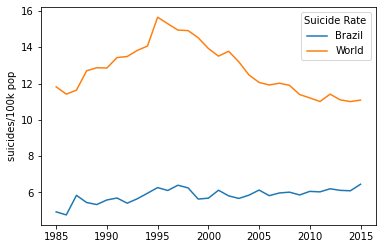

In [31]:
# pegar a media mundial e do Brasil em suicidios

years = df_brazil.year.unique() # pegar os anos para o eixo x

suicides_brazil_mean = df_brazil.groupby('year')['suicides/100k pop'].mean() #Média de suicídios no Brasil

suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean() #Média de suicídios no Mundo

#==========================

suicides_world_mean.drop(2016, inplace=True) #Tira o ano de 2016, pois no DF do Brasil não tem esse ano

#==========================

#Plotar lineplot comparativo entre Brasil e Mundo

ax = sns.lineplot(x=years, y=suicides_brazil_mean, label='Brazil')

ax = sns.lineplot(x=years, y=suicides_world_mean, label='World')

plt.legend(title='Suicide Rate')

plt.show()




# **Age group with the highest suicide rate**

In [32]:
#Criar uma tabela dinâmica

table = pd.pivot_table(df_brazil, values='suicides_no', index=['year'], columns=['age'])

#Reodenar as tableas para deixar em ordem crescente

column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

table = table.reindex(column_order, axis=1)

table.head()


age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5


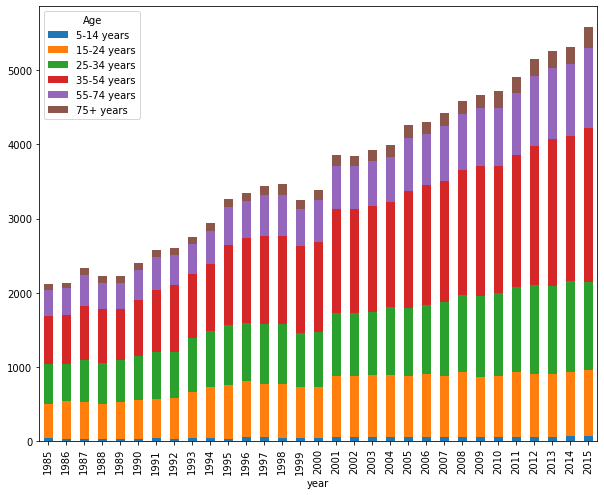

In [33]:
#Plotar a pivot_table das faixas etárias


table.plot.bar(stacked=True, figsize=(10, 8))

plt.legend(title="Age");

In [34]:
# Estatística de suicídios por faixa etária

table[['25-34 years']].loc[2015]
table.loc[2015] / table.loc[2015].sum()

age
5-14 years     0.012094
15-24 years    0.159993
25-34 years    0.211681
35-54 years    0.371585
55-74 years    0.194571
75+ years      0.050076
Name: 2015, dtype: float64

# **Suicide rate between men and women**

In [35]:
#Primeiro é necessário extrair os valores entre homens e mulheres

men_women = df_brazil.groupby('sex').suicides_no.sum() / df_brazil.groupby('sex').suicides_no.sum().sum()

men_women

sex
female    0.216294
male      0.783706
Name: suicides_no, dtype: float64

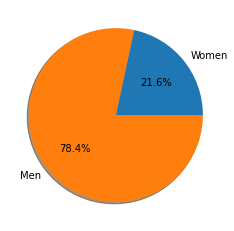

In [36]:
#Plotar o gráfico de pizza com os resultados

plt.pie(men_women, labels=['Women', 'Men'], autopct='%1.1f%%', shadow=True);

# Correlations between HDI, gdp per capita and suicide's numbers

In [37]:
corr = df_brazil.corr()
corr

,Unnamed: 0,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
Unnamed: 0,1.000000,0.999483,0.246694,0.292010,0.016081,0.996971,0.838615
year,0.999483,1.000000,0.264806,0.280673,0.044983,0.997391,0.839049
suicides_no,0.246694,0.264806,1.000000,0.420440,0.434466,0.258756,0.227476
population,0.292010,0.280673,0.420440,1.000000,-0.412420,0.296896,0.231104
suicides/100k pop,0.016081,0.044983,0.434466,-0.412420,1.000000,0.053730,0.038782
HDI for year,0.996971,0.997391,0.258756,0.296896,0.053730,1.000000,0.906527
gdp_per_capita ($),0.838615,0.839049,0.227476,0.231104,0.038782,0.906527,1.000000


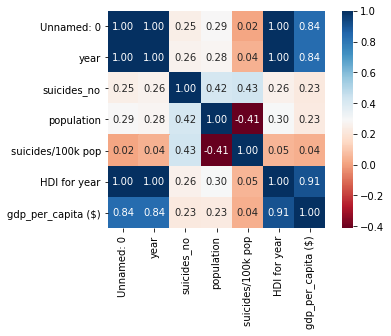

In [38]:
## Plotar heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Criando uma matriz de correlação, infere-se que o aumento no PIB per capita não diminuiu o número de suicídios por 100 mil habitantes. Na verdade, ele se manteve estável, contrariando o senso comum da maioria das pessoas.

Em relação ao IDH há muitos valores ausentes nas células, o que pode dar uma interpretação incorreta ou com viés.